# L(2,1) Recursive Largest First Implementation

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

In [24]:
def color_L21(G):
    """
    Finds L(2,1) coloring of a given graph
    G: nx graph object
    colorings: dict with node:color assignment
    """
    
    colorings = {}
    color = 0
    graph_not_colored = True
    
    #initialize dict of node labels, which records which nodes are legal in a given round of coloring
    node_status = {}
    for node in G.nodes():
        node_status[node] = []

    #order vertices max to min degree
    order_degree_inc = sorted(G.degree, key=lambda x: x[1], reverse=True) 
    order = [order_degree_inc[i][0] for i in range(len(order_degree_inc))] #pull out vertices, discard degree
    

    #iterate through colors according to rules of L(2,1) until whole graph is colored
    while graph_not_colored:
        
        #color nodes with single color until no legal nodes are left
        curr_color_done = False
        while True: 
            
            #determine highest order legal node to color next
            iterator = 0
            while True:
                center_try = order[iterator] #check (next) highest degree vertex
                
                if node_status[center_try] == [] and not center_try in colorings:
                    center = center_try
                    break
                    
                if center_try == order[len(order) - 1]: #if at last vertex in order and not set as center
                    curr_color_done = True #set flag to end run of current color
                    break
                    
                iterator += 1 #check next vertex in order
            
            #end run of current color
            if curr_color_done:
                break

            colorings[center] = color #color max node current color

            #add labels in node_status to 1st adjacences of center
            adj_1 = list(G.neighbors(center))
            for node in adj_1:
                node_status[node].append("curr1st")
                
            #add labels in node_status to 2nd adjacences of center
            for node in adj_1:
                for adj_2 in list(G.neighbors(node)):
                    node_status[adj_2].append("curr2nd")

        #update node_status labels for next round
        for node in node_status:
            node_status[node][:] = [x for x in node_status[node] if x!="curr2nd" or "prev1st"] #remove curr2nd and prev1st labels
            node_status[node][:] = ["prev1st" for x in node_status[node] if x=="curr1st"] #change curr1st labels to prev1st
        
        color += 1 #iterate to next color for next round
        
        #check if graph is fully colored, if so, end loop
        if len(colorings) == len(order):
            print(colorings)
            return colorings
            graph_not_colored = False

In [25]:
def draw_graph(G, colorings):
    """
    Plots the colored graph
    G: nx graph object
    colorings: output from color_l21 (which is dict with node: color assignment) 
    """
    
    nodeList = list(G.nodes()) #get nodes of G
    
    #get coloring in order of G
    final_colorings = {}
    for node in nodeList:
        final_colorings.update({node: colorings[node]})
    
    #make set of random color options
    color_options = []
    for i in range(100):
        color_options.append('#%06X' % randint(0, 0xAAAAAA))
    
    #put color and label into structure
    color_map = []
    label_dict = {}
    labels = range(100)
    for vertex in final_colorings:
        color_map.append(color_options[colorings[vertex]])
        label_dict.update({vertex: labels[colorings[vertex]]})
    
    #draw G with each node being the assigned color (and color's number)
    nx.draw(G, node_color = color_map, labels = label_dict, with_labels = True)
    plt.show()

{0: 0, 3: 0, 6: 0, 9: 0, 12: 0, 15: 0, 17: 1, 1: 2, 4: 2, 7: 2, 10: 2, 13: 2, 16: 3, 19: 3, 2: 4, 5: 4, 8: 4, 11: 4, 14: 4, 18: 5}


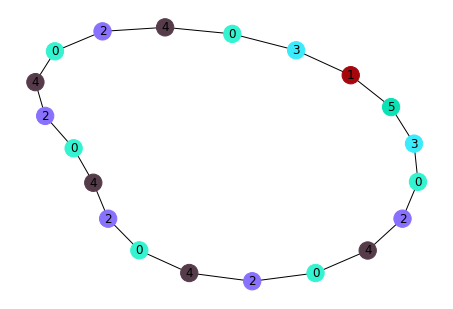

In [26]:
#sample graph to select
G = nx.cycle_graph(20) 
# G = nx.karate_club_graph()

colorings = color_L21(G)
draw_graph(G, colorings)

Follow this link for more fun graph examples to try out:
https://networkx.org/documentation/stable/reference/generators.html